In [57]:
import pandas as pd
import numpy as np

import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [59]:
mpl.rc('font', family = 'Malgun Gothic')

In [6]:
df = pd.read_csv('df_clean (1).csv')
df

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C)
0,C,2016-01-01,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6
1,C,2016-01-02,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4
2,C,2016-01-03,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5
3,C,2016-01-04,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6
4,C,2016-01-05,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,E,2021-12-27,415.503015,143.892147,71.906009,53.200819,41.760308,6.364743,2.841248,9.7,1024.8,64.0,3.6
10946,E,2021-12-28,434.316347,48.107213,58.232143,118.650293,12.985400,0.195919,4.138122,4.0,1024.7,50.0,7.4
10947,E,2021-12-29,794.317377,385.030842,19.093795,422.931986,29.410096,13.174599,0.557669,7.2,1016.6,54.0,10.1
10948,E,2021-12-30,5.899518,287.952697,86.338297,472.694232,29.898581,9.994247,4.920187,12.7,1018.4,60.0,5.3


In [12]:
df['일시'] = pd.to_datetime(df['일시'])

# 상관계수확인

In [53]:
df.columns

Index(['위치', '일시', '현재발전출력', '수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
       '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)'],
      dtype='object')

C:\Users\campus4D042\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\campus4D042\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


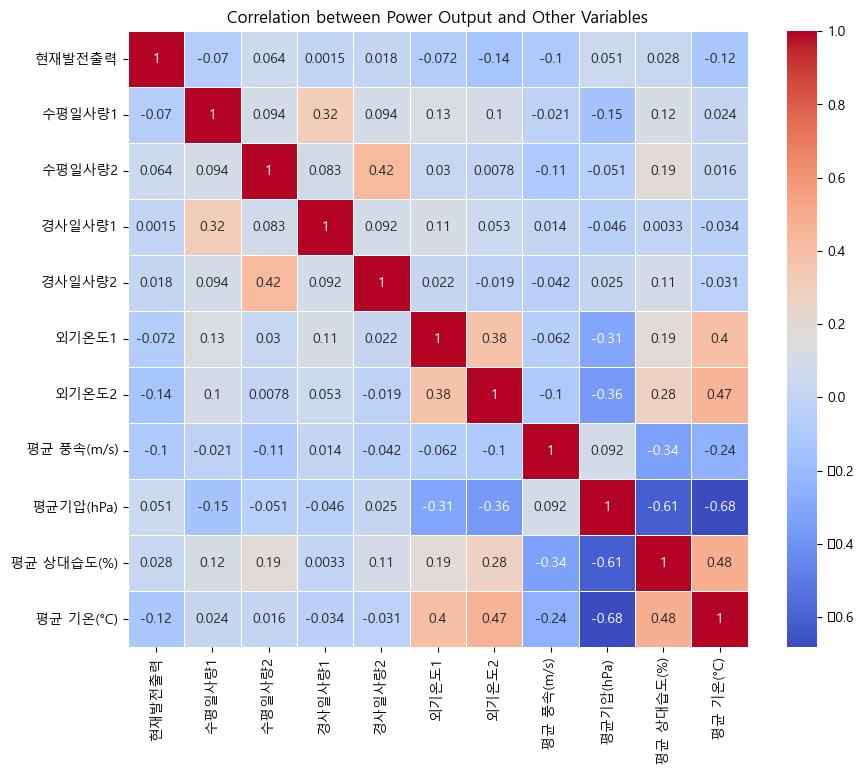

In [61]:
correlation_matrix = df[['현재발전출력', '수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1', '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)']].corr()

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Power Output and Other Variables')
plt.show()

# 모델링

In [20]:
df_1 = df.drop(['일시'], axis = 1)
df_1

,위치,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C)
0,C,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6
1,C,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4
2,C,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5
3,C,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6
4,C,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...
10945,E,415.503015,143.892147,71.906009,53.200819,41.760308,6.364743,2.841248,9.7,1024.8,64.0,3.6
10946,E,434.316347,48.107213,58.232143,118.650293,12.985400,0.195919,4.138122,4.0,1024.7,50.0,7.4
10947,E,794.317377,385.030842,19.093795,422.931986,29.410096,13.174599,0.557669,7.2,1016.6,54.0,10.1
10948,E,5.899518,287.952697,86.338297,472.694232,29.898581,9.994247,4.920187,12.7,1018.4,60.0,5.3


In [22]:
df_encoded = pd.get_dummies(df_1, columns=['위치'])
df_encoded

,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),위치_A,위치_B,위치_C,위치_D,위치_E
0,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6,False,False,True,False,False
1,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4,False,False,True,False,False
2,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5,False,False,True,False,False
3,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6,False,False,True,False,False
4,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,415.503015,143.892147,71.906009,53.200819,41.760308,6.364743,2.841248,9.7,1024.8,64.0,3.6,False,False,False,False,True
10946,434.316347,48.107213,58.232143,118.650293,12.985400,0.195919,4.138122,4.0,1024.7,50.0,7.4,False,False,False,False,True
10947,794.317377,385.030842,19.093795,422.931986,29.410096,13.174599,0.557669,7.2,1016.6,54.0,10.1,False,False,False,False,True
10948,5.899518,287.952697,86.338297,472.694232,29.898581,9.994247,4.920187,12.7,1018.4,60.0,5.3,False,False,False,False,True


In [24]:
X = df_encoded.drop(['현재발전출력'], axis =1)
y = df_encoded['현재발전출력']

In [26]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor(max_depth = 3)
dt_clf.fit(train_input,train_target)

DecisionTreeRegressor(max_depth=3)

In [30]:
print(dt_clf.score(train_input, train_target))
print(dt_clf.score(test_input, test_target))

0.718701455210127
0.6934271669944196


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 모델 예측값 계산
train_predictions = dt_clf.predict(train_input)
test_predictions = dt_clf.predict(test_input)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(train_target, train_predictions))
test_rmse = np.sqrt(mean_squared_error(test_target, test_predictions))

# MAE 계산
train_mae = mean_absolute_error(train_target, train_predictions)
test_mae = mean_absolute_error(test_target, test_predictions)

# 결과 출력
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train RMSE: 1630.641737277428
Test RMSE: 1666.3087070927324
Train MAE: 721.4261361307153
Test MAE: 730.0249208081241


In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 3)
rf.fit(train_input,train_target)

RandomForestRegressor(max_depth=3)

In [38]:
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.7286851743140654
0.7125858724636795


In [40]:
# 모델 예측값 계산
train_predictions = rf.predict(train_input)
test_predictions = rf.predict(test_input)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(train_target, train_predictions))
test_rmse = np.sqrt(mean_squared_error(test_target, test_predictions))

# MAE 계산
train_mae = mean_absolute_error(train_target, train_predictions)
test_mae = mean_absolute_error(test_target, test_predictions)

# 결과 출력
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train RMSE: 1601.443327863187
Test RMSE: 1613.4023526889096
Train MAE: 711.7957046752426
Test MAE: 713.3247290501896


# 앙상블

In [94]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [126]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth = 6)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth = 6)

ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('gb', gb_model)])

ensemble_model.fit(train_input, train_target)

print(ensemble_model.score(train_input, train_target))
print(ensemble_model.score(test_input, test_target))

0.8453783417385766
0.7317850033249687


In [127]:
# 모델 예측값 계산
train_predictions = ensemble_model.predict(train_input)
test_predictions = ensemble_model.predict(test_input)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(train_target, train_predictions))
test_rmse = np.sqrt(mean_squared_error(test_target, test_predictions))

# MAE 계산
train_mae = mean_absolute_error(train_target, train_predictions)
test_mae = mean_absolute_error(test_target, test_predictions)

# 결과 출력
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train RMSE: 1208.9545517510162
Test RMSE: 1558.5838024333289
Train MAE: 540.4994939547738
Test MAE: 686.8723952945653


In [134]:
rf_model.fit(train_input, train_target)
rf_importances = rf_model.feature_importances_

# 그래디언트 부스팅에서 feature importance 추출
gb_model.fit(train_input, train_target)
gb_importances = gb_model.feature_importances_

# 피처 이름 추출
feature_names = X.columns

# 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest_Importance': rf_importances,
    'GradientBoosting_Importance': gb_importances
})

# 중요도 평균 계산 (단순 평균)
importance_df['Average_Importance'] = importance_df[['RandomForest_Importance', 'GradientBoosting_Importance']].mean(axis=1)

# 중요도 출력
print(importance_df.sort_values(by='Average_Importance', ascending=False))

       Feature  RandomForest_Importance  GradientBoosting_Importance  \
11        위치_B                 0.869062                     0.771649   
2       경사일사량1                 0.032315                     0.037749   
1       수평일사량2                 0.019169                     0.032530   
0       수평일사량1                 0.016820                     0.026393   
3       경사일사량2                 0.012127                     0.025648   
5        외기온도2                 0.009899                     0.024949   
7    평균기압(hPa)                 0.011688                     0.020598   
4        외기온도1                 0.006386                     0.017365   
9    평균 기온(°C)                 0.006769                     0.015802   
6   평균 풍속(m/s)                 0.005772                     0.012224   
8   평균 상대습도(%)                 0.006014                     0.011489   
14        위치_E                 0.003166                     0.002784   
13        위치_D                 0.000806                     0.00

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_19904\1036471287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.sort_values(by='Average_Importance', ascending=False),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


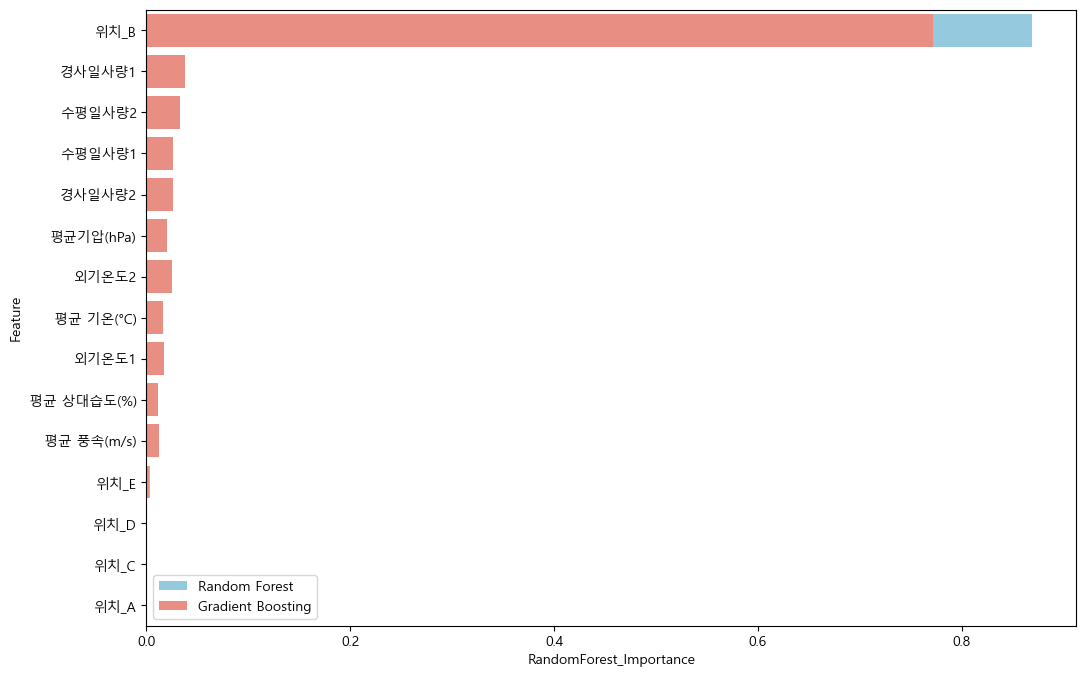

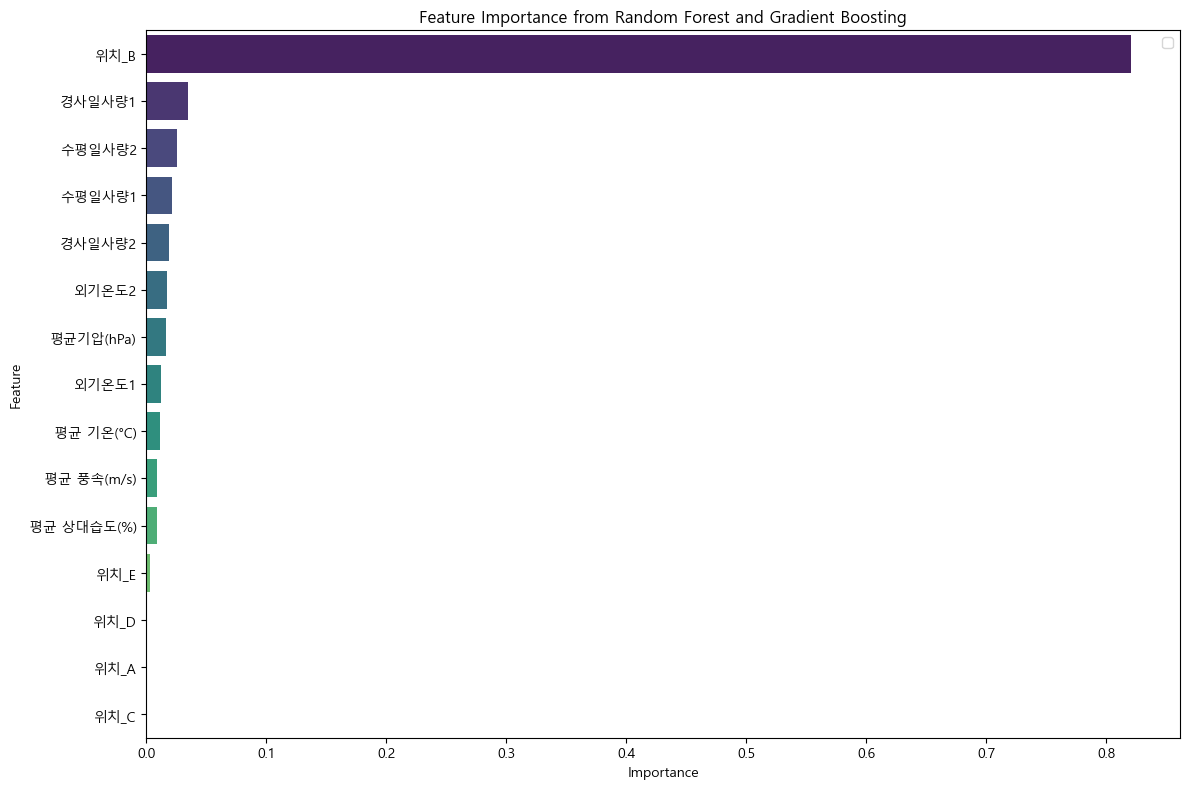

In [136]:
plt.figure(figsize=(12, 8))

# Plot RandomForest Importance
sns.barplot(data=importance_df.sort_values(by='RandomForest_Importance', ascending=False), 
            x='RandomForest_Importance', y='Feature', color='skyblue', label='Random Forest')

# Plot GradientBoosting Importance
sns.barplot(data=importance_df.sort_values(by='GradientBoosting_Importance', ascending=False), 
            x='GradientBoosting_Importance', y='Feature', color='salmon', label='Gradient Boosting')

# Add Average Importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.sort_values(by='Average_Importance', ascending=False), 
            x='Average_Importance', y='Feature', palette='viridis')

# Customizing the plot
plt.title('Feature Importance from Random Forest and Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()

# 위치B빼고

In [145]:
X = df.drop(['현재발전출력', '위치', '일시'], axis =1)
y = df['현재발전출력']

In [147]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth = 6)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth = 6)

ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('gb', gb_model)])

ensemble_model.fit(train_input, train_target)

print(ensemble_model.score(train_input, train_target))
print(ensemble_model.score(test_input, test_target))

0.36887792349669357
0.17590179142683426


In [151]:
rf_model.fit(train_input, train_target)
rf_importances = rf_model.feature_importances_

# 그래디언트 부스팅에서 feature importance 추출
gb_model.fit(train_input, train_target)
gb_importances = gb_model.feature_importances_

# 피처 이름 추출
feature_names = X.columns

# 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest_Importance': rf_importances,
    'GradientBoosting_Importance': gb_importances
})

# 중요도 평균 계산 (단순 평균)
importance_df['Average_Importance'] = importance_df[['RandomForest_Importance', 'GradientBoosting_Importance']].mean(axis=1)

# 중요도 출력
print(importance_df.sort_values(by='Average_Importance', ascending=False))

      Feature  RandomForest_Importance  GradientBoosting_Importance  \
4       외기온도1                 0.227759                     0.138986   
0      수평일사량1                 0.184581                     0.129352   
5       외기온도2                 0.130237                     0.123550   
3      경사일사량2                 0.115775                     0.108792   
1      수평일사량2                 0.091570                     0.120088   
2      경사일사량1                 0.067105                     0.130865   
6  평균 풍속(m/s)                 0.078889                     0.057410   
9   평균 기온(°C)                 0.044896                     0.083022   
8  평균 상대습도(%)                 0.041665                     0.059109   
7   평균기압(hPa)                 0.017523                     0.048826   

   Average_Importance  
4            0.183372  
0            0.156967  
5            0.126894  
3            0.112284  
1            0.105829  
2            0.098985  
6            0.068149  
9            0.063959  
8 

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_19904\1036471287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.sort_values(by='Average_Importance', ascending=False),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


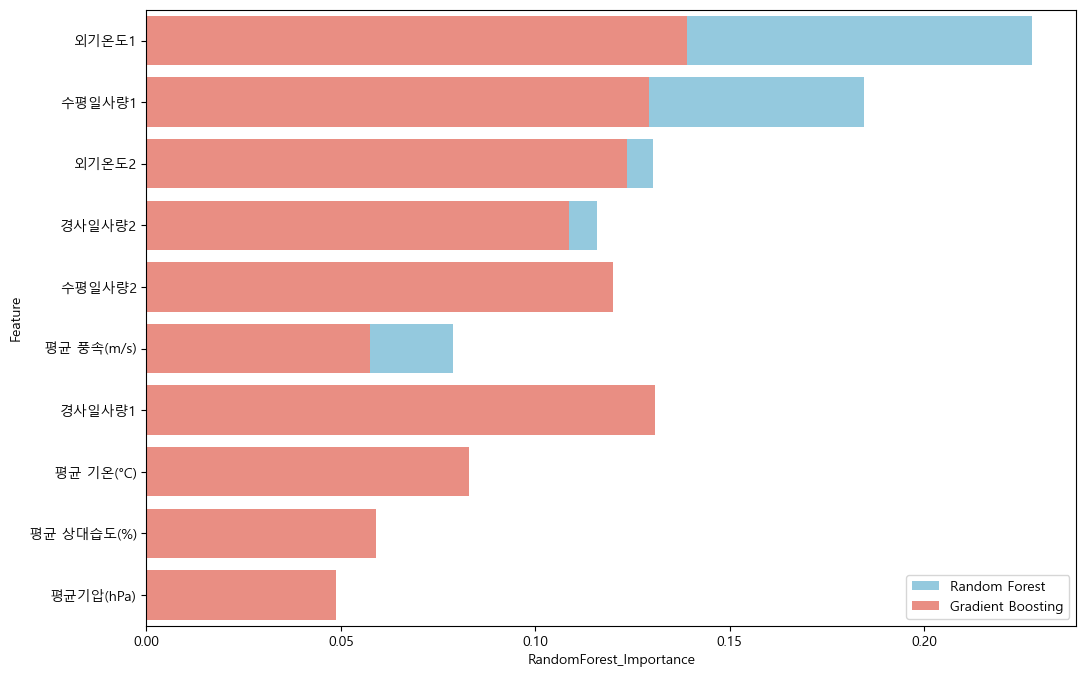

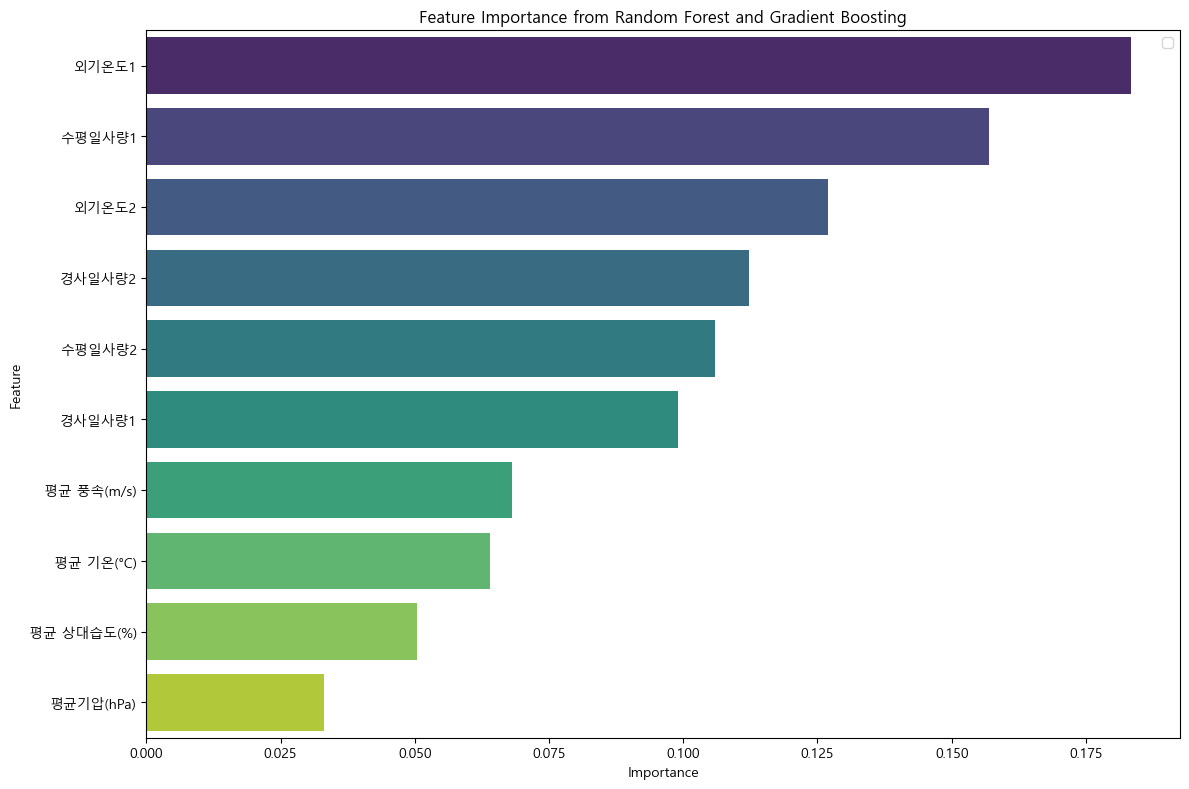

In [152]:
plt.figure(figsize=(12, 8))

# Plot RandomForest Importance
sns.barplot(data=importance_df.sort_values(by='RandomForest_Importance', ascending=False), 
            x='RandomForest_Importance', y='Feature', color='skyblue', label='Random Forest')

# Plot GradientBoosting Importance
sns.barplot(data=importance_df.sort_values(by='GradientBoosting_Importance', ascending=False), 
            x='GradientBoosting_Importance', y='Feature', color='salmon', label='Gradient Boosting')

# Add Average Importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.sort_values(by='Average_Importance', ascending=False), 
            x='Average_Importance', y='Feature', palette='viridis')

# Customizing the plot
plt.title('Feature Importance from Random Forest and Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()

# 스태킹

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

In [168]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state=42)

# 메타 모델 정의
meta_model = LinearRegression()

# 스택 앙상블 모델 정의
stacking_model = StackingRegressor(
    estimators=[('rf', rf_model), ('gb', gb_model)],
    final_estimator=meta_model
)

# 스택 앙상블 모델 훈련
stacking_model.fit(train_input, train_target)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=6,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(max_depth=6,
                                                         random_state=42))],
                  final_estimator=LinearRegression())

In [172]:
print(stacking_model.score(train_input, train_target))
print(stacking_model.score(test_input, test_target))

0.48196616192244823
0.19215139251317925


In [174]:
# 모델 예측값 계산
train_predictions = stacking_model.predict(train_input)
test_predictions = stacking_model.predict(test_input)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(train_target, train_predictions))
test_rmse = np.sqrt(mean_squared_error(test_target, test_predictions))

# MAE 계산
train_mae = mean_absolute_error(train_target, train_predictions)
test_mae = mean_absolute_error(test_target, test_predictions)

# 결과 출력
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train RMSE: 2212.8596809051087
Test RMSE: 2704.914988705396
Train MAE: 1410.7510637053333
Test MAE: 1715.8651390742675


In [176]:
rf_model.fit(train_input, train_target)
rf_importances = rf_model.feature_importances_

# 그래디언트 부스팅에서 feature importance 추출
gb_model.fit(train_input, train_target)
gb_importances = gb_model.feature_importances_

# 피처 이름 추출
feature_names = X.columns

# 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest_Importance': rf_importances,
    'GradientBoosting_Importance': gb_importances
})

# 중요도 평균 계산 (단순 평균)
importance_df['Average_Importance'] = importance_df[['RandomForest_Importance', 'GradientBoosting_Importance']].mean(axis=1)

# 중요도 출력
print(importance_df.sort_values(by='Average_Importance', ascending=False))

      Feature  RandomForest_Importance  GradientBoosting_Importance  \
4       외기온도1                 0.227759                     0.138986   
0      수평일사량1                 0.184581                     0.129352   
5       외기온도2                 0.130237                     0.123550   
3      경사일사량2                 0.115775                     0.108792   
1      수평일사량2                 0.091570                     0.120088   
2      경사일사량1                 0.067105                     0.130865   
6  평균 풍속(m/s)                 0.078889                     0.057410   
9   평균 기온(°C)                 0.044896                     0.083022   
8  평균 상대습도(%)                 0.041665                     0.059109   
7   평균기압(hPa)                 0.017523                     0.048826   

   Average_Importance  
4            0.183372  
0            0.156967  
5            0.126894  
3            0.112284  
1            0.105829  
2            0.098985  
6            0.068149  
9            0.063959  
8 

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_19904\1036471287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.sort_values(by='Average_Importance', ascending=False),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


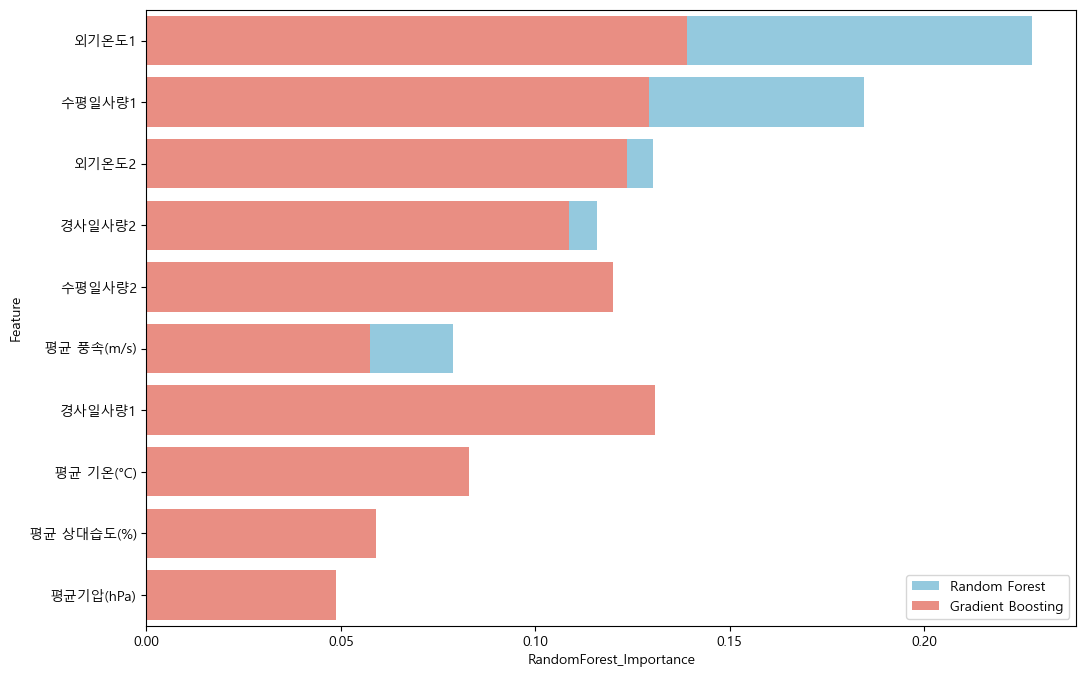

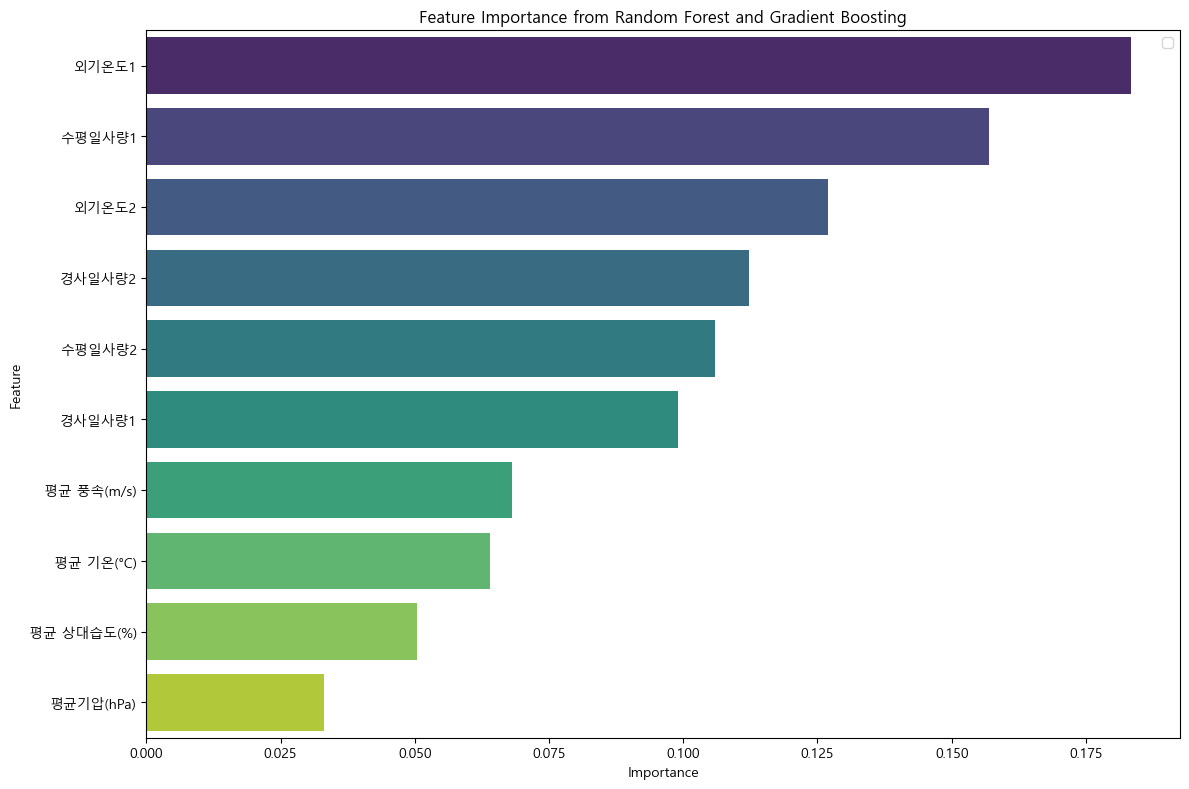

In [178]:
plt.figure(figsize=(12, 8))

# Plot RandomForest Importance
sns.barplot(data=importance_df.sort_values(by='RandomForest_Importance', ascending=False), 
            x='RandomForest_Importance', y='Feature', color='skyblue', label='Random Forest')

# Plot GradientBoosting Importance
sns.barplot(data=importance_df.sort_values(by='GradientBoosting_Importance', ascending=False), 
            x='GradientBoosting_Importance', y='Feature', color='salmon', label='Gradient Boosting')

# Add Average Importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.sort_values(by='Average_Importance', ascending=False), 
            x='Average_Importance', y='Feature', palette='viridis')

# Customizing the plot
plt.title('Feature Importance from Random Forest and Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()

# 군집화

In [47]:
df.columns

Index(['위치', '일시', '현재발전출력', '수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
       '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)'],
      dtype='object')

In [63]:
df

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C)
0,C,2016-01-01,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6
1,C,2016-01-02,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4
2,C,2016-01-03,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5
3,C,2016-01-04,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6
4,C,2016-01-05,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,E,2021-12-27,415.503015,143.892147,71.906009,53.200819,41.760308,6.364743,2.841248,9.7,1024.8,64.0,3.6
10946,E,2021-12-28,434.316347,48.107213,58.232143,118.650293,12.985400,0.195919,4.138122,4.0,1024.7,50.0,7.4
10947,E,2021-12-29,794.317377,385.030842,19.093795,422.931986,29.410096,13.174599,0.557669,7.2,1016.6,54.0,10.1
10948,E,2021-12-30,5.899518,287.952697,86.338297,472.694232,29.898581,9.994247,4.920187,12.7,1018.4,60.0,5.3


In [67]:
features = df[['현재발전출력', '수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', 
                  '외기온도1', '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)']]

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 클러스터 수를 설정하고 KMeans 클러스터링 수행
num_clusters = 5  # 클러스터 수를 설정하세요
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
df

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C)
0,C,2016-01-01,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6
1,C,2016-01-02,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4
2,C,2016-01-03,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5
3,C,2016-01-04,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6
4,C,2016-01-05,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,E,2021-12-27,415.503015,143.892147,71.906009,53.200819,41.760308,6.364743,2.841248,9.7,1024.8,64.0,3.6
10946,E,2021-12-28,434.316347,48.107213,58.232143,118.650293,12.985400,0.195919,4.138122,4.0,1024.7,50.0,7.4
10947,E,2021-12-29,794.317377,385.030842,19.093795,422.931986,29.410096,13.174599,0.557669,7.2,1016.6,54.0,10.1
10948,E,2021-12-30,5.899518,287.952697,86.338297,472.694232,29.898581,9.994247,4.920187,12.7,1018.4,60.0,5.3


# 실루엣지수

In [77]:
from sklearn.metrics import silhouette_score

평균 실루엣 지수: 0.127


C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수 2일 때 실루엣 지수: 0.175


C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수 3일 때 실루엣 지수: 0.151


C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수 4일 때 실루엣 지수: 0.159


C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수 5일 때 실루엣 지수: 0.127


C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수 6일 때 실루엣 지수: 0.116


C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수 7일 때 실루엣 지수: 0.113


C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수 8일 때 실루엣 지수: 0.112


C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수 9일 때 실루엣 지수: 0.109


C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수 10일 때 실루엣 지수: 0.109


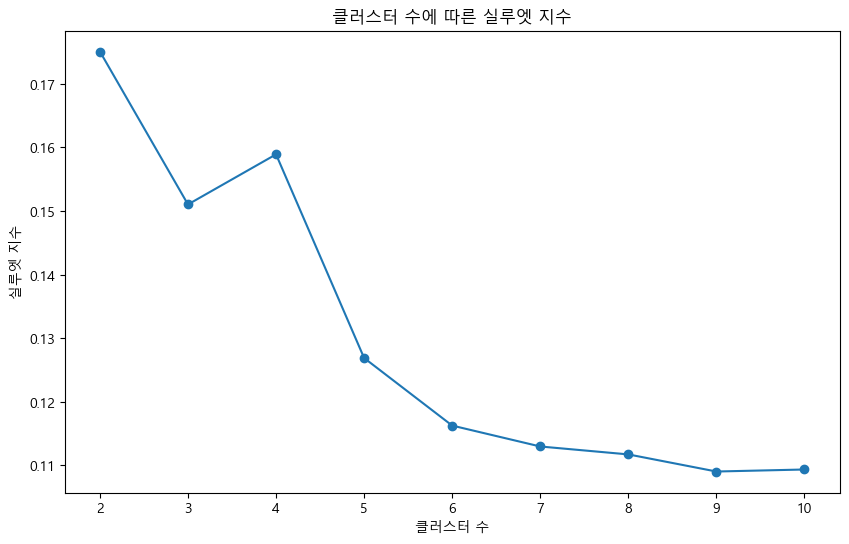

In [79]:
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'평균 실루엣 지수: {silhouette_avg:.3f}')

# 클러스터 수를 변경하면서 실루엣 지수를 시각화 (최적의 클러스터 수 탐색)
range_n_clusters = list(range(2, 11))  # 클러스터 수를 2부터 10까지 시도
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f'클러스터 수 {n_clusters}일 때 실루엣 지수: {silhouette_avg:.3f}')

# 실루엣 지수 시각화
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('클러스터 수')
plt.ylabel('실루엣 지수')
plt.title('클러스터 수에 따른 실루엣 지수')
plt.show()

# 엘보우 메소드

C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\campus4D042\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\campus4D042\anaconda3\L

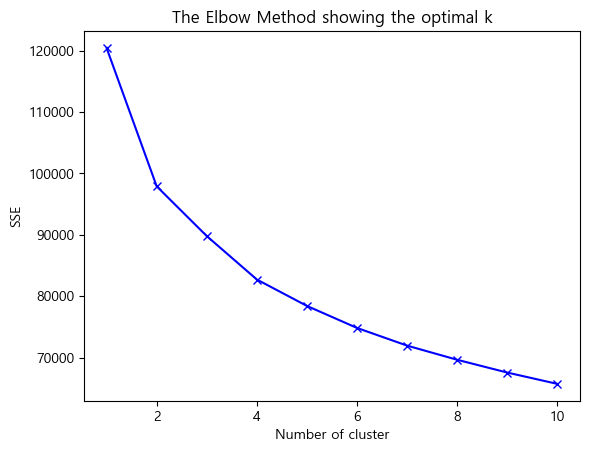

In [81]:
# 최적의 클러스터 수 찾기 (Elbow Method)
import matplotlib.pyplot as plt
import seaborn as sns
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_features)
    sse[k] = kmeans.inertia_  # SSE for each n_clusters

# 최적의 클러스터 수를 찾기 위한 SSE 값 시각화
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method showing the optimal k')
plt.show()